# KNN Exercise

Due to the simplicity of KNN for Classification, let's focus on using a Pipeline and a GridSearchCV tool, since these skills can be generalized for any model.


## The Sonar Data

### Detecting a Rock or a Mine

Sonar (sound navigation ranging) is a technique that uses sound propagation (usually underwater, as in submarine navigation) to navigate, communicate with or detect objects on or under the surface of the water, such as other vessels.



The data set contains the response metrics for 60 separate sonar frequencies sent out against a known mine field (and known rocks). These frequencies are then labeled with the known object they were beaming the sound at (either a rock or a mine).



Our main goal is to create a machine learning model capable of detecting the difference between a rock or a mine based on the response of the 60 separate sonar frequencies.


Data Source: https://archive.ics.uci.edu/ml/datasets/Connectionist+Bench+(Sonar,+Mines+vs.+Rocks)

### Complete the Tasks in bold

**TASK: Run the cells below to load the data.**

In [2]:
import numpy as np
import pandas as pd

In [1]:
from google.colab import files
uploaded=files.upload()

Saving sonar.all-data.csv to sonar.all-data.csv


In [3]:
df = pd.read_csv('sonar.all-data.csv')

In [4]:
df.head()

,Freq_1,Freq_2,Freq_3,Freq_4,Freq_5,Freq_6,Freq_7,Freq_8,Freq_9,Freq_10,...,Freq_52,Freq_53,Freq_54,Freq_55,Freq_56,Freq_57,Freq_58,Freq_59,Freq_60,Label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: The solution uses a random_state=42*

In [ ]:
# CODE HERE

In [5]:
from sklearn.model_selection import train_test_split
X = df.drop(['Label'],axis=1)
y = df['Label']

X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [ ]:
# X stores all features (sonar frequency readings).
# y stores the labels ("Rock" or "Mine").
# train_test_split() splits the dataset:
#  90% for training (X_cv, y_cv)
#  10% for final testing (X_test, y_test)
# random_state=42 ensures reproducibility.

**TASK: Create a Pipeline that contains both a StandardScaler and a KNN model**

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [8]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [9]:
operations = [('scaler',scaler),('knn',knn)]

In [10]:
from sklearn.pipeline import Pipeline
pipe = Pipeline(operations)

In [ ]:
# StandardScaler(): Normalizes the data so that all features have mean = 0 and std = 1 (important for KNN).
# KNeighborsClassifier(): Initializes a KNN model (default k=5).
# Pipeline(): Combines both steps so that:
#   Data is scaled before training the model.
#   This process can be applied automatically.

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [11]:
k_values = list(range(1,20))
param_grid = {'knn__n_neighbors': k_values}

In [12]:
from sklearn.model_selection import GridSearchCV
full_search = GridSearchCV(pipe,param_grid,scoring='accuracy')

In [14]:
full_search.fit(X_cv,y_cv)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [15]:
full_search.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'transform_input': None,
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [ ]:
# Defines different k values to test (from 1 to 19).
# Creates param_grid, which tells GridSearchCV to optimize n_neighbors in KNN.
# GridSearchCV(pipe, param_grid, scoring='accuracy'):
#  Runs the KNN model multiple times, each time using a different k value.
#  Evaluates performance using accuracy.
#  Finds the best k value automatically.
# full_search.best_estimator_.get_params() prints the best found k-value.

# Understanding the Output
# Pipeline Steps (steps):

#  The model consists of two steps:
#    scaler: A StandardScaler() for feature scaling.
#    knn: A KNeighborsClassifier(n_neighbors=1), meaning it uses 1 nearest neighbor.

#Scaler Parameters (scaler_...)

# scaler_with_mean: True → The scaler centers the data by subtracting the mean.
# scaler_with_std: True → The scaler scales the data by dividing by the standard deviation.
# scaler_copy: True → The transformation does not overwrite the original data.

#KNN Classifier Parameters (knn_...)

# knn_algorithm: 'auto' → The algorithm automatically chooses the best method (brute force or KD-tree).
# knn_leaf_size: 30 → This is related to how the tree is structured for searching neighbors (affects speed).
# knn_metric: 'minkowski' → The distance metric used is Minkowski distance, which generalizes Euclidean and Manhattan distances.
# knn_p: 2 → Since p=2, the Minkowski distance reduces to Euclidean distance.
# knn_weights: 'uniform' → All neighbors contribute equally to the prediction.
# knn_n_neighbors: 1 → The best k found is 1.


#This means that after searching for the best k value (number of neighbors), the best-performing model used k = 1 with standard scaling applied to the data. The classifier uses Euclidean distance (p=2) and assigns equal weight to all neighbors.

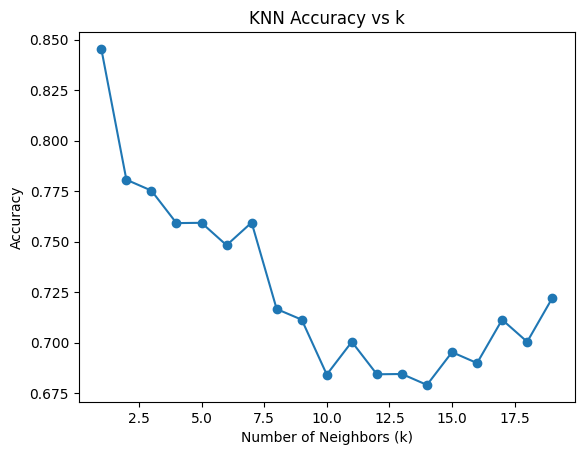

In [19]:
import matplotlib.pyplot as plt

results = full_search.cv_results_
plt.plot(k_values, results['mean_test_score'], marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs k")
plt.show()

# accuracy vs k

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

In [16]:
pred=full_search.predict(X_test)

In [17]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]])

In [18]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21



In [ ]:
# Uses the best KNN model (from GridSearchCV) to predict labels for X_test.
# confusion_matrix(): Shows how many predictions were correct vs. incorrect.
# classification_report():
#  Shows precision, recall, and F1-score for both "Rock" and "Mine" classes.
#  Helps evaluate the overall performance.

### Great Job!